<a href="https://colab.research.google.com/github/profugohenrique/spoincd/blob/master/INCDDiagnosticoModelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

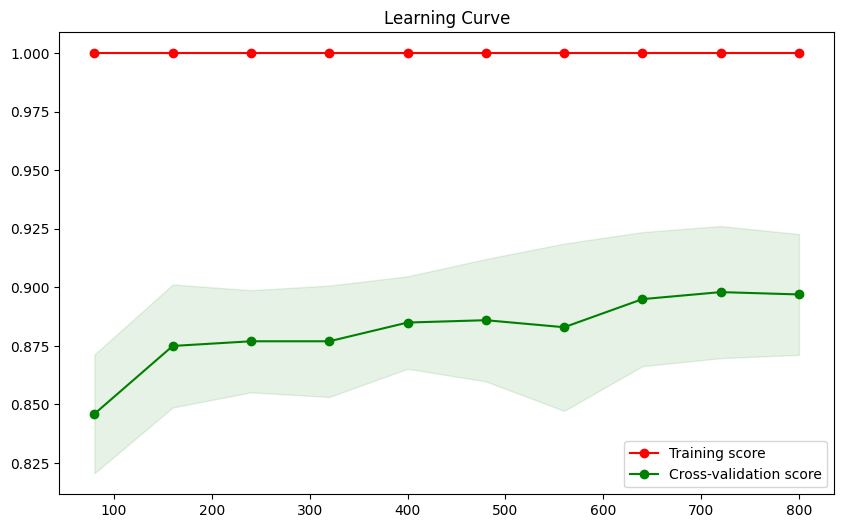

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Gerar dados de exemplo
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

def plot_learning_curve(estimator, title, X, y, cv=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color='g')

    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Exemplo de curva de aprendizado
model = RandomForestClassifier(n_estimators=100)
plot_learning_curve(model, "Learning Curve", X, y, cv=5)

In [2]:
#CV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Carregar dados
iris = load_iris()
X, y = iris.data, iris.target

# K-Fold tradicional
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print(f"K-Fold Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

K-Fold Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean Accuracy: 0.973 (+/- 0.050)


In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

# Stratified K-Fold (mantém proporção das classes)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Múltiplas métricas
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(model, X, y, cv=skf, scoring=scoring)

for metric in scoring:
    mean_score = np.mean(scores[f'test_{metric}'])
    std_score = np.std(scores[f'test_{metric}'])
    print(f"{metric}: {mean_score:.3f} (+/- {std_score:.3f})")

accuracy: 0.967 (+/- 0.030)
precision_macro: 0.969 (+/- 0.028)
recall_macro: 0.967 (+/- 0.030)
f1_macro: 0.967 (+/- 0.030)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


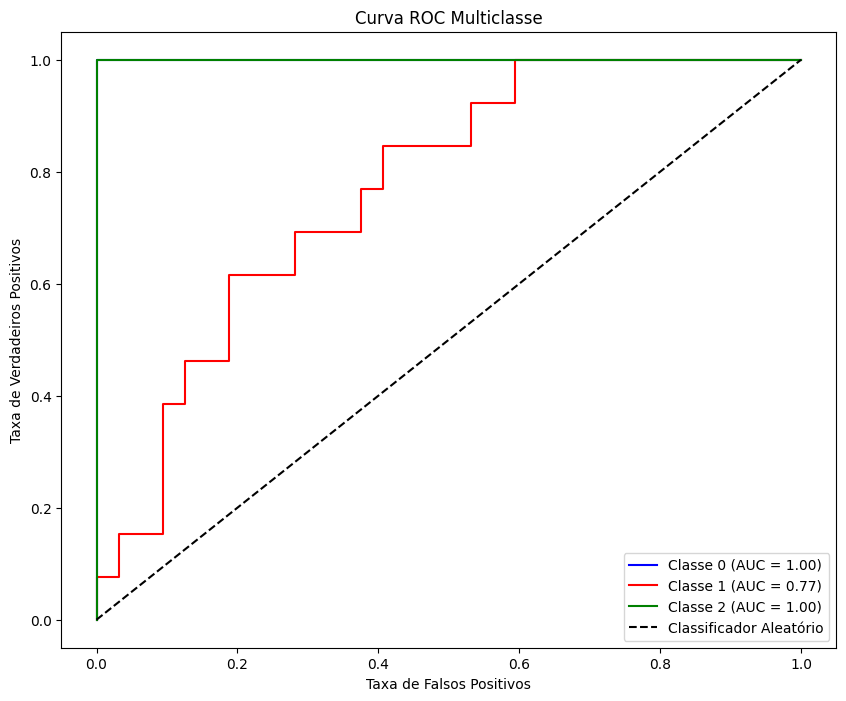

In [4]:
#############  Métricas
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Preparar dados para multiclasse
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Modelo multiclasse
model_ovr = OneVsRestClassifier(LogisticRegression())
model_ovr.fit(X_train, y_train)
y_score = model_ovr.predict_proba(X_test)

# Plot ROC curve para cada classe
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'red', 'green']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=colors[i],
             label=f'Classe {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse')
plt.legend()
plt.show()

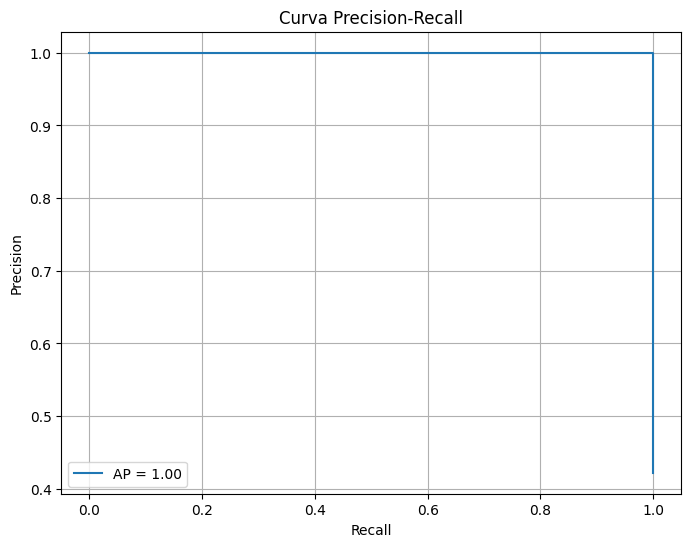

In [6]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# Para classe 0 (exemplo)
y_true = y_test[:, 0]
y_pred = y_score[:, 0]

precision, recall, _ = precision_recall_curve(y_true, y_pred)
avg_precision = average_precision_score(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
##Exemplo completo
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# Criar pipeline com pré-processamento
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Definir parâmetros para GridSearch
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# GridSearch com Cross-Validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Treinar modelo
grid_search.fit(X, y)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score:", grid_search.best_score_)

# Avaliação detalhada
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nRelatório de Classificação:")
print(classification_report(y_test.argmax(axis=1), y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Melhores parâmetros: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Melhor score: 0.9666666666666668

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Top 5 modelos:
    mean_test_score  std_test_score  \
16         0.966667        0.029814   
17         0.966667        0.029814   
25         0.966667        0.029814   
0          0.960000        0.038873   
1          0.960000        0.038873   

                                               params  
16  {'classifier__max_depth': 10, 'classifier__min...  
17  {'classifier__max_depth': 10, 'classifier__min...  
25  {'classifier__max_depth': 20, 'classifier__min...  
0   {'classifier__max_depth': None, 'classifier__m...  
1   {'classifier__max_depth': None, 'classifier__m...  


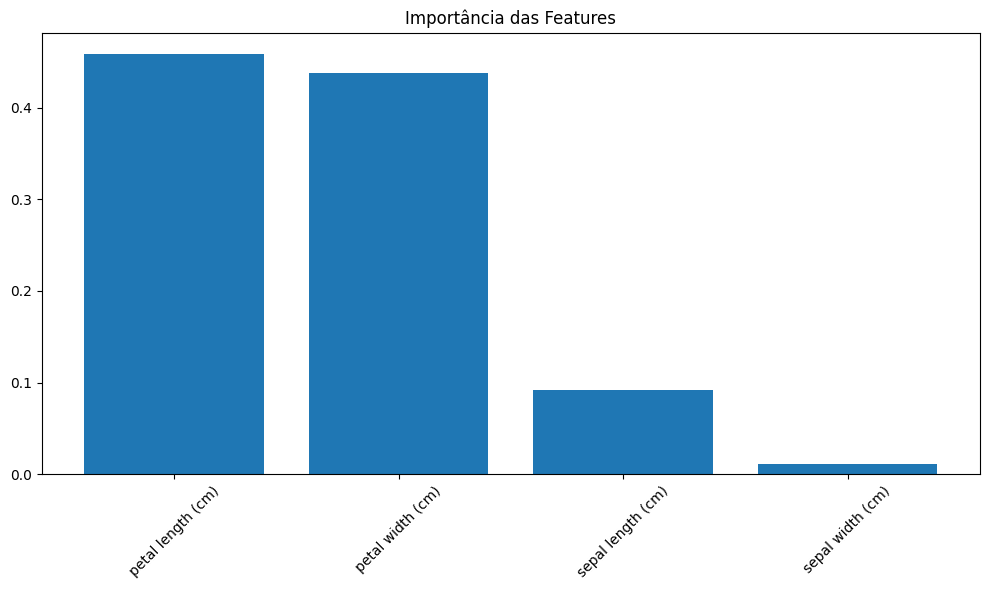

In [9]:
#Analise dos resultados
# Analisar resultados do GridSearch
results = pd.DataFrame(grid_search.cv_results_)

# Visualizar top 5 modelos
top_models = results.nlargest(5, 'mean_test_score')
print("Top 5 modelos:")
print(top_models[['mean_test_score', 'std_test_score', 'params']])

# Plot de importância das features (para Random Forest)
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    feature_importance = best_model.named_steps['classifier'].feature_importances_
    features = iris.feature_names

    plt.figure(figsize=(10, 6))
    indices = np.argsort(feature_importance)[::-1]
    plt.bar(range(len(features)), feature_importance[indices])
    plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
    plt.title('Importância das Features')
    plt.tight_layout()
    plt.show()

In [10]:
##Diagnostico de Over e Under
def diagnose_model(model, X_train, X_test, y_train, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f"Training Score: {train_score:.3f}")
    print(f"Test Score: {test_score:.3f}")
    print(f"Gap: {abs(train_score - test_score):.3f}")

    if train_score > test_score + 0.1:
        print("  Possível OVERFITTING")
    elif train_score < 0.7 and test_score < 0.7:
        print("  Possível UNDERFITTING")
    else:
        print(" Modelo bem generalizado")

# Aplicar diagnóstico
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
diagnose_model(best_model, X_train, X_test, y_train, y_test)

Training Score: 0.962
Test Score: 1.000
Gap: 0.038
 Modelo bem generalizado
